<a href="https://colab.research.google.com/github/farlut18/Python-for-Analysis/blob/main/Final_Project_of_Mentoring_Python_DA9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Pakistan's Largest E-Commerce Dataset

##Source: https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset

Data yang digunakan adalah data yang berasal dari Kaggle:  Pakistan's Largest E-Commerce Dataset dengan beberapa perubahan. Harga yang tertera sudah dikonversi 1 Rupee sama dengan Rp 58. Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [ ]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/myskill/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/myskill/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/myskill/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/myskill/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [ ]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR8723933690j,C269125L,2021-01-07,P268025,113100,1,113100.0,0.0,113100.0,1,1,1,1
1,ODR4598875560c,C693630L,2021-01-07,P767128,13920,1,13920.0,0.0,13920.0,1,0,0,1
2,ODR8911603924d,C693630L,2021-11-25,P512707,15660,1,15660.0,0.0,15660.0,1,0,0,2
3,ODR9378341541o,C226141L,2021-01-07,P238882,142100,1,142100.0,0.0,142100.0,1,0,0,1
4,ODR1386982371d,C226141L,2022-05-19,P206879,30740,1,30740.0,0.0,30740.0,1,1,1,1


In [ ]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [ ]:
#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C269125L,2021-07-16
1,C693630L,2021-07-15
2,C226141L,2021-07-28
3,C996508L,2021-07-10
4,C180415L,2021-07-18


In [ ]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P576453,UnzeLondon_L24273-8,57855.0,42224,Women Fashion
1,P741727,amnaismail_AI KC 34-L,57855.0,39324,Women Fashion
2,P432347,amnaismail_AI KC 34-M,57855.0,44544,Women Fashion
3,P817533,amnaismail_AI KC 37-M,57855.0,35844,Women Fashion
4,P856172,amnaismail_AI KC 37-L,57855.0,35264,Women Fashion


In [ ]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

58013

In [ ]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [ ]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR8723933690j,C269125L,2021-01-07,P268025,113100,1,113100.0,0.0,113100.0,1,1,1,1,cod,kreations_YI 06-L,113100.0,92742,Women Fashion,2021-07-16
1,ODR4598875560c,C693630L,2021-01-07,P767128,13920,1,13920.0,0.0,13920.0,1,0,0,1,cod,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,13920.0,10266,Beauty & Grooming,2021-07-15
2,ODR8911603924d,C693630L,2021-11-25,P512707,15660,1,15660.0,0.0,15660.0,1,0,0,2,jazzvoucher,RS_Habshi Halwa Tin,15660.0,12992,Soghaat,2021-07-15
3,ODR9378341541o,C226141L,2021-01-07,P238882,142100,1,142100.0,0.0,142100.0,1,0,0,1,cod,Ego_UP0017-999-MR0,142100.0,85260,Women Fashion,2021-07-28
4,ODR1386982371d,C226141L,2022-05-19,P206879,30740,1,30740.0,0.0,30740.0,1,1,1,1,cod,BT_BT-422,30740.0,26738,Men Fashion,2021-07-28


In [ ]:
#Menampikan tipe data tiap kolom
df.dtypes

id                  object
customer_id         object
order_date          object
sku_id              object
price                int64
qty_ordered          int64
before_discount    float64
discount_amount    float64
after_discount     float64
is_gross             int64
is_valid             int64
is_net               int64
payment_id           int64
payment_method      object
sku_name            object
base_price         float64
cogs                 int64
category            object
registered_date     object
dtype: object

In [ ]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

id                 object
customer_id        object
order_date         object
sku_id             object
price               int64
qty_ordered         int64
before_discount     int64
discount_amount     int64
after_discount      int64
is_gross            int64
is_valid            int64
is_net              int64
payment_id          int64
payment_method     object
sku_name           object
base_price          int64
cogs                int64
category           object
registered_date    object
dtype: object

In [ ]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int64
discount_amount             int64
after_discount              int64
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                  int64
payment_method             object
sku_name                   object
base_price                  int64
cogs                        int64
category                   object
registered_date    datetime64[ns]
dtype: object

## Nomor 1
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

In [ ]:
#Menyimpan data dalam bentuk Pandas DataFrame
data1 = pd.DataFrame(\
                     #Memfilter data dengan valid=1
                     df[(df['is_valid']== 1) &\
                        #Memfilter data dengan Category = Mobiles & Tablets
                        (df['category']=='Mobiles & Tablets') &\
                        #Memfilter data pada transaksi selama 2022
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]\
                     #Mengelompokan data
                     .groupby(by=["sku_name"])["qty_ordered"]\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data
                     .sort_values(ascending=False)\
                     #Mengambil TOP 5 Produk
                     .head(5)\
                     #Mereset nama header
                     .reset_index(name='qty_2022'))
data1

,sku_name,qty_2022
0,IDROID_BALRX7-Gold,1632
1,IDROID_BALRX7-Jet black,1014
2,IDROID_BALRX7-Jet black,542
3,Mobo_ar1,524
4,Infinix Hot 4-Black,396


<ipython-input-14-1564789d5909>:8: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  data1.plot(x='sku_name',


<Axes: title={'center': 'TOP 5 Product'}, xlabel='Quntity', ylabel='Product Name'>

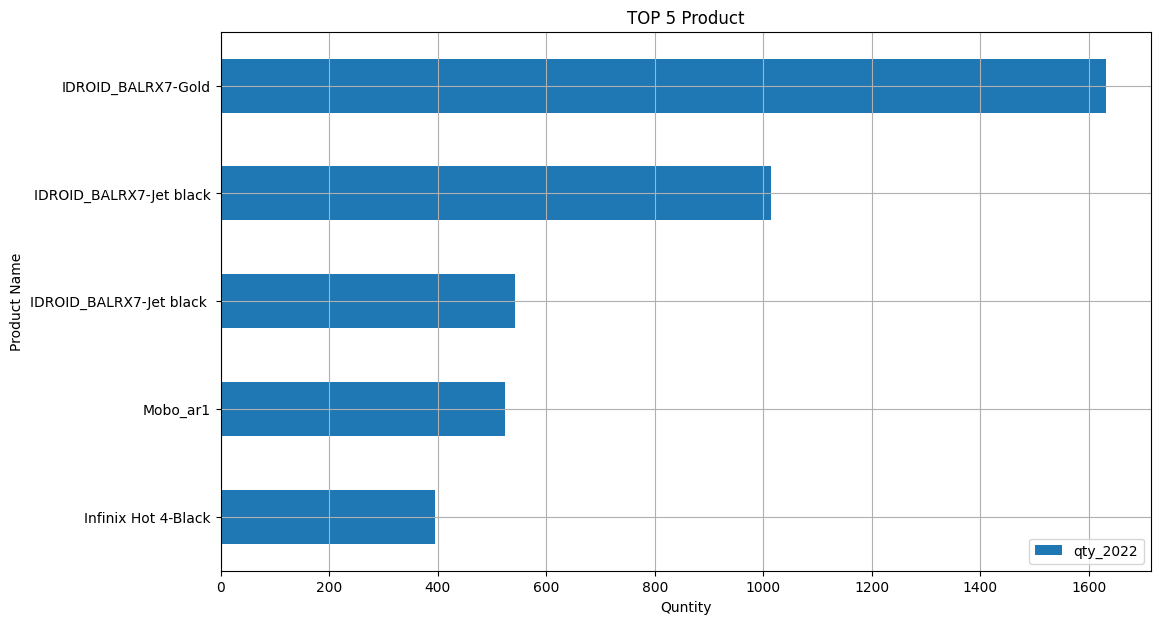

In [ ]:
#Sort data untuk dapat digunakan sebagai grafik
data1.sort_values(\
                  by=['qty_2022'], \
                  ascending=True,\
                  inplace=True)

#Membuat grafik
data1.plot(x='sku_name',
           y=['qty_2022'],
           kind='barh',
           grid = True,
           xlabel = 'Quntity',
           ylabel = 'Product Name',
           figsize=(12,7),
           rot = 0,
           title = 'TOP 5 Product',
           table = False,
           sort_columns = False,
           secondary_y = False)

## Nomor 2 & 3
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Beauty & Grooming pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Beauty & Grooming, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

## Nomor 2

In [ ]:
#Menyimpan data dalam bentuk Pandas DataFrame
data2 = pd.DataFrame(\
                     #Memfilter data dengan valid=1
                     df[(df['is_valid']==1) &\
                        #Memfilter data pada transaksi selama 2021
                        ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]\
                     #Mengelompokan data
                     .groupby(by=["category"])["qty_ordered"]\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data
                     .sort_values(ascending=True)\
                     #Mereset nama header
                     .reset_index(name='qty_2021'))
data2

,category,qty_2021
0,Books,454
1,School & Education,1101
2,Entertainment,1502
3,Computing,2418
4,Kids & Baby,2971
5,Health & Sports,3607
6,Others,4017
7,Home & Living,4408
8,Superstore,5274
9,Appliances,5947


In [ ]:
#Menyimpan data dalam bentuk Pandas DataFrame
data3 = pd.DataFrame(\
                     #Memfilter data dengan valid=1
                     df[(df['is_valid']== 1) &\
                        #Memfilter data pada transaksi selama 2022
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]\
                     #Mengelompokan data
                     .groupby(by=["category"])["qty_ordered"]\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data
                     .sort_values(ascending=True)\
                     #Mereset nama header
                     .reset_index(name='qty_2022'))
data3

,category,qty_2022
0,Books,691
1,School & Education,1165
2,Computing,2251
3,Entertainment,2336
4,Others,2594
5,Health & Sports,4039
6,Kids & Baby,5437
7,Appliances,5651
8,Home & Living,5986
9,Beauty & Grooming,8005


In [ ]:
data4 = data2.merge(data3, left_on = 'category', right_on = 'category')
data4

,category,qty_2021,qty_2022
0,Books,454,691
1,School & Education,1101,1165
2,Entertainment,1502,2336
3,Computing,2418,2251
4,Kids & Baby,2971,5437
5,Health & Sports,3607,4039
6,Others,4017,2594
7,Home & Living,4408,5986
8,Superstore,5274,27905
9,Appliances,5947,5651


In [ ]:
#Growth = tahun terakhir - tahun sebelumnya
data4['qty_growth']=data4['qty_2021']-data4['qty_2022']
data4.sort_values(by=['qty_growth'],ascending=True,inplace=True)
data4

,category,qty_2021,qty_2022,qty_growth
8,Superstore,5274,27905,-22631
10,Women Fashion,7240,17325,-10085
12,Mobiles & Tablets,14431,20890,-6459
4,Kids & Baby,2971,5437,-2466
7,Home & Living,4408,5986,-1578
2,Entertainment,1502,2336,-834
5,Health & Sports,3607,4039,-432
0,Books,454,691,-237
1,School & Education,1101,1165,-64
3,Computing,2418,2251,167


## Nomor 3

In [ ]:
#Menyimpan data dalam bentuk Pandas DataFrame
data5 = pd.DataFrame(\
                     #Memfilter data dengan valid=1
                     df[(df['is_valid']==1) &\
                        (df['category']=='Beauty & Grooming') &\
                        #Memfilter data pada transaksi selama 2021
                        ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]\
                     #Mengelompokan data
                     .groupby(by=["sku_name"])["qty_ordered"]\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data
                     .sort_values(ascending=False)\
                     #Mereset nama header
                     .reset_index(name='qty_bg_2021'))
data5

,sku_name,qty_bg_2021
0,kcc_krone deal,1583
1,kcc_glamour deal,535
2,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,268
3,emart_Nova Straightener + Curler,245
4,kcc_blaze,239
...,...,...
1304,TO_066-2 IN 1 MAKE UP BRUSH,1
1305,TO_073-The Balm Cosmetics Mary-Lou Manizer,1
1306,TO_080-BUNDLE DEAL CONTOUR & BLENDER,1
1307,TO_083-PACK OF 2 ADS EYELINER GEL,1


In [ ]:
#Menyimpan data dalam bentuk Pandas DataFrame
data6 = pd.DataFrame(\
                     #Memfilter data dengan valid=1
                     df[(df['is_valid']==1) &\
                        (df['category']=='Beauty & Grooming') &\
                        #Memfilter data pada transaksi selama 2022
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]\
                     #Mengelompokan data
                     .groupby(by=["sku_name"])["qty_ordered"]\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data
                     .sort_values(ascending=False)\
                     #Mereset nama header
                     .reset_index(name='qty_bg_2022'))
data6

,sku_name,qty_bg_2022
0,kcc_krone deal,448
1,kcc_glamour deal,175
2,un_Beauty Care Bundle_BC,103
3,BO_All-In-One Manicure Set,100
4,nabila_Nchant FOR Olive,90
...,...,...
1807,SFEVER_CH369HB0EHEHSNAFAMZ,1
1808,SFEVER_CH813HB0FO4AWNAFAMZ,1
1809,SFEVER_CH813HB0G7EO4NAFAMZ,1
1810,SFEVER_CH813HB0U0NZCNAFAMZ,1


In [ ]:
#Menggabungkan data
data7 = data5.merge(data6, left_on = 'sku_name', right_on = 'sku_name')
data7['qty_bg_growth']=data7['qty_bg_2022']-data7['qty_bg_2021']
data7.sort_values(by=['qty_bg_growth'],ascending=True,inplace=True)
data7 = data7.head(20)
data7

,sku_name,qty_bg_2021,qty_bg_2022,qty_bg_growth
0,kcc_krone deal,1583,448,-1135
1,kcc_glamour deal,535,175,-360
2,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,268,2,-266
4,kcc_blaze,239,4,-235
5,emart_Ding Ling Trimmer rf 608,214,2,-212
3,emart_Nova Straightener + Curler,245,35,-210
7,kcc_jazzy,208,47,-161
6,itter_AB 1211,213,77,-136
9,Bold_Fresh,135,9,-126
8,Bold_Active,135,11,-124


## Nomor 4
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

In [ ]:
#Menyimpan data dalam bentuk Pandas DataFrame
data8 = df[\
            #Memfilter data dengan gross=1
            (df['is_gross']== 1) &\
            #Memfilter data dengan valid=0
            (df['is_valid']== 0) &\
            #Memfilter data dengan net=0
            (df['is_net']== 0) &\
            #Memfilter data pada transaksi selama 2022
            ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]

In [ ]:
data9 = data8[['customer_id','registered_date']]
data9

,customer_id,registered_date
276,C996508L,2021-07-10
279,C996508L,2021-07-10
280,C996508L,2021-07-10
286,C996508L,2021-07-10
294,C996508L,2021-07-10
...,...,...
287243,C125653L,2022-08-09
287245,C173391L,2022-08-26
287246,C173393L,2022-08-03
287247,C173393L,2022-08-03


In [ ]:
from google.colab import files
data9.to_csv('audience_list.csv', encoding = 'utf-8-sig',index=False)
files.download('audience_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Nomor 5 & 6
**Dear Data Analyst**,
<br></br>
Bulan depan kami akan membuat Laporan Tahunan yang akan kami sampaikan ke Investor, terkait hal tersebut mohon sediakan data berikut:
1. Profit Growth (%) secara keseluruhan tahun 2021 vs 2022 sebagai hasil kinerja tahunan penjualan.
<br></br>
2. Profit Growth (%) berdasarkan Kategori produk tahun 2021 vs 2022.

Mohon bantuan untuk mengirimkan data tersebut paling lambat besok. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Board of Director (BOD)**

## Nomor 5

In [ ]:
#Menghitung profit
df['profit'] = df['after_discount'] - df['cogs'] * df['qty_ordered']

In [ ]:
#Menyimpan data dalam bentuk Pandas DataFrame
data10 = df[\
            #Memfilter data dengan valid=1
            (df['is_valid']== 1) &\
            #Memfilter data pada transaksi selama 2022
            ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]

In [ ]:
#Menyimpan data dalam bentuk Pandas DataFrame
data11 = df[\
            #Memfilter data dengan valid=1
            (df['is_valid']== 1) &\
            #Memfilter data pada transaksi selama 2021
            ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]

In [ ]:
#Membuat Dataframe dan Summary
data12 = {\
          'Periode Profit':'Total',\
          '2021': data11['profit'].sum(), \
          '2022': data10['profit'].sum(),\
          'Growth (Value)': data10['profit'].sum() - data11['profit'].sum(),\
          'Growth': pd.Series(round(((data10['profit'].sum() - data11['profit'].sum())/data11['profit'].sum())*100,2), dtype=str)+'%'
          }
pd.DataFrame(data=data12, index=[0])

,Periode Profit,2021,2022,Growth (Value),Growth
0,Total,2670490791,3322770995,652280204,24.43%


## Nomor 6

In [ ]:
#Menggunakan Groupby untuk menjumlahkan
data13 = pd.DataFrame(data10\
                     .groupby(by="category")["profit"].sum()\
                     .sort_values(ascending=False)\
                     .reset_index(name='profit_2022'))
data13

,category,profit_2022
0,Mobiles & Tablets,1652331813
1,Appliances,431194364
2,Women Fashion,345456009
3,Entertainment,265278418
4,Men Fashion,182532305
5,Computing,117410987
6,Beauty & Grooming,75062298
7,Superstore,71088733
8,Home & Living,59669684
9,Health & Sports,47521457


In [ ]:
data14 = pd.DataFrame(data11\
                     .groupby(by="category")["profit"].sum()\
                     .sort_values(ascending=False)\
                     .reset_index(name='profit_2021'))
data14

,category,profit_2021
0,Mobiles & Tablets,1396876667
1,Appliances,355859467
2,Men Fashion,226619440
3,Entertainment,185811715
4,Women Fashion,129540444
5,Computing,81856228
6,Beauty & Grooming,70581738
7,Home & Living,55279026
8,Soghaat,44221318
9,Health & Sports,40444993


In [ ]:
#Menggabungkan data
data15 = data14.merge(data13, left_on = 'category', right_on = 'category')
data15

,category,profit_2021,profit_2022
0,Mobiles & Tablets,1396876667,1652331813
1,Appliances,355859467,431194364
2,Men Fashion,226619440,182532305
3,Entertainment,185811715,265278418
4,Women Fashion,129540444,345456009
5,Computing,81856228,117410987
6,Beauty & Grooming,70581738,75062298
7,Home & Living,55279026,59669684
8,Soghaat,44221318,31300117
9,Health & Sports,40444993,47521457


In [ ]:
#Melakukan kalkulasi
data15['Growth (Value)'] = data15['profit_2022']-data15['profit_2021']
data15['Growth (%)'] = round(data15['Growth (Value)']/data15['profit_2021']*100,2 )
data15.sort_values(by=['Growth (%)'], ascending = False, inplace = True)
data15

,category,profit_2021,profit_2022,Growth (Value),Growth (%)
4,Women Fashion,129540444,345456009,215915565,166.68
10,Superstore,28865817,71088733,42222916,146.27
5,Computing,81856228,117410987,35554759,43.44
3,Entertainment,185811715,265278418,79466703,42.77
1,Appliances,355859467,431194364,75334897,21.17
0,Mobiles & Tablets,1396876667,1652331813,255455146,18.29
9,Health & Sports,40444993,47521457,7076464,17.50
13,School & Education,7210265,7934794,724529,10.05
7,Home & Living,55279026,59669684,4390658,7.94
6,Beauty & Grooming,70581738,75062298,4480560,6.35


<ipython-input-33-c7a0017d078f>:2: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  data15.plot(x='category',


<Axes: title={'center': 'Growth 2021 vs 2022'}, xlabel='Category', ylabel='Growth (%)'>

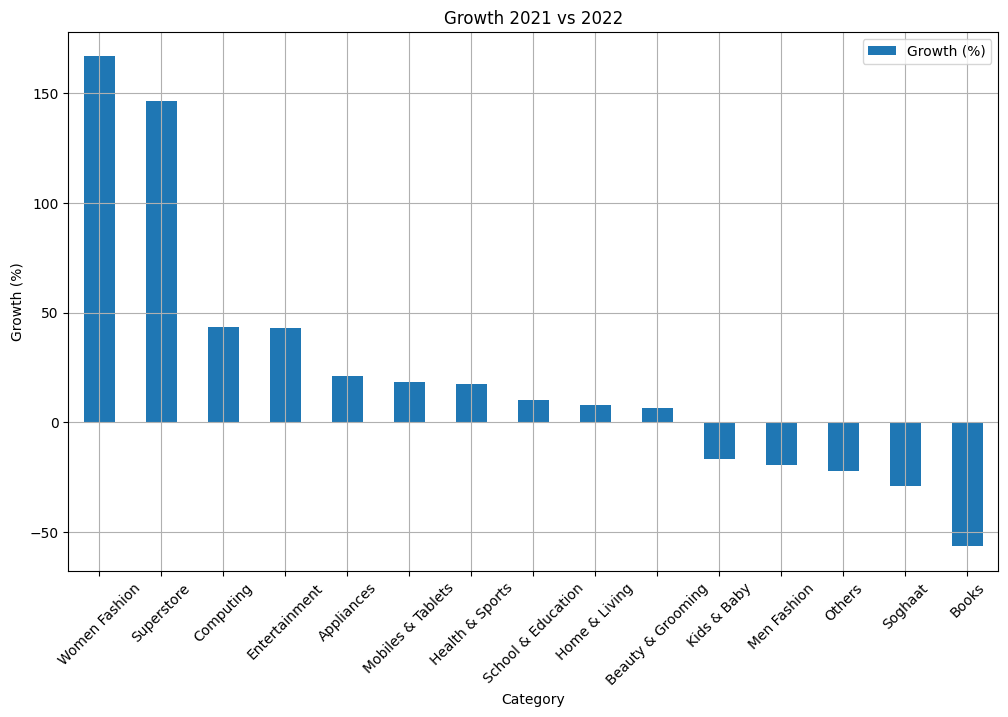

In [ ]:
#Membuat grafik
data15.plot(x='category',
           y=['Growth (%)'],
           kind='bar',
           grid = True,
           title = 'Growth 2021 vs 2022',
           xlabel = 'Category',
           ylabel = 'Growth (%)',
           figsize=(12,7),
           rot = 45,
           table = False,
           sort_columns = False,
           secondary_y = False)

## Nomor 7 & 8
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

## Nomor 7

In [ ]:
#Membuat kolom tambahan untuk day, month, month_num
df['day']=df['order_date'].dt.day_name()
df['month']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month
df.head(5)

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_method,sku_name,base_price,cogs,category,registered_date,profit,day,month,month_num
0,ODR8723933690j,C269125L,2021-01-07,P268025,113100,1,113100,0,113100,1,...,cod,kreations_YI 06-L,113100,92742,Women Fashion,2021-07-16,20358,Thursday,January,1
1,ODR4598875560c,C693630L,2021-01-07,P767128,13920,1,13920,0,13920,1,...,cod,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,13920,10266,Beauty & Grooming,2021-07-15,3654,Thursday,January,1
2,ODR8911603924d,C693630L,2021-11-25,P512707,15660,1,15660,0,15660,1,...,jazzvoucher,RS_Habshi Halwa Tin,15660,12992,Soghaat,2021-07-15,2668,Thursday,November,11
3,ODR9378341541o,C226141L,2021-01-07,P238882,142100,1,142100,0,142100,1,...,cod,Ego_UP0017-999-MR0,142100,85260,Women Fashion,2021-07-28,56840,Thursday,January,1
4,ODR1386982371d,C226141L,2022-05-19,P206879,30740,1,30740,0,30740,1,...,cod,BT_BT-422,30740,26738,Men Fashion,2021-07-28,4002,Thursday,May,5


In [ ]:
data16 = pd.DataFrame(df[(df['is_valid']==1) \
                        & (df['day'].isin(['Saturday','Sunday']))\
                        & (df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31')]\
                     .groupby(by=["month_num","month"])["before_discount"].mean()\
                     .round()\
                     .sort_values(ascending=False)\
                     .reset_index(name='avg_profit_weekend'))
data16

,month_num,month,avg_profit_weekend
0,12,December,168817.0
1,11,November,138973.0
2,10,October,124681.0


In [ ]:
data17 = pd.DataFrame(df[(df['is_valid']==1) \
                        & (df['day'].isin(['Monday','Tuesday','Wednesday','Thusday','Friday']))\
                        & (df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31')]\
                     .groupby(by=["month_num","month"])["before_discount"].mean()\
                     .sort_values(ascending=False)\
                     .round()\
                     .reset_index(name='avg_profit_weekdays'))
data17

,month_num,month,avg_profit_weekdays
0,10,October,168393.0
1,11,November,154603.0
2,12,December,112494.0


In [ ]:
data18 = data16.merge(data17, left_on = 'month', right_on = 'month')
data18.sort_values(by='month_num_x',ascending=True, inplace=True)
data18 = data18[["month","avg_profit_weekend","avg_profit_weekdays"]]
data18

,month,avg_profit_weekend,avg_profit_weekdays
2,October,124681.0,168393.0
1,November,138973.0,154603.0
0,December,168817.0,112494.0


<Axes: xlabel='Category', ylabel='Total'>

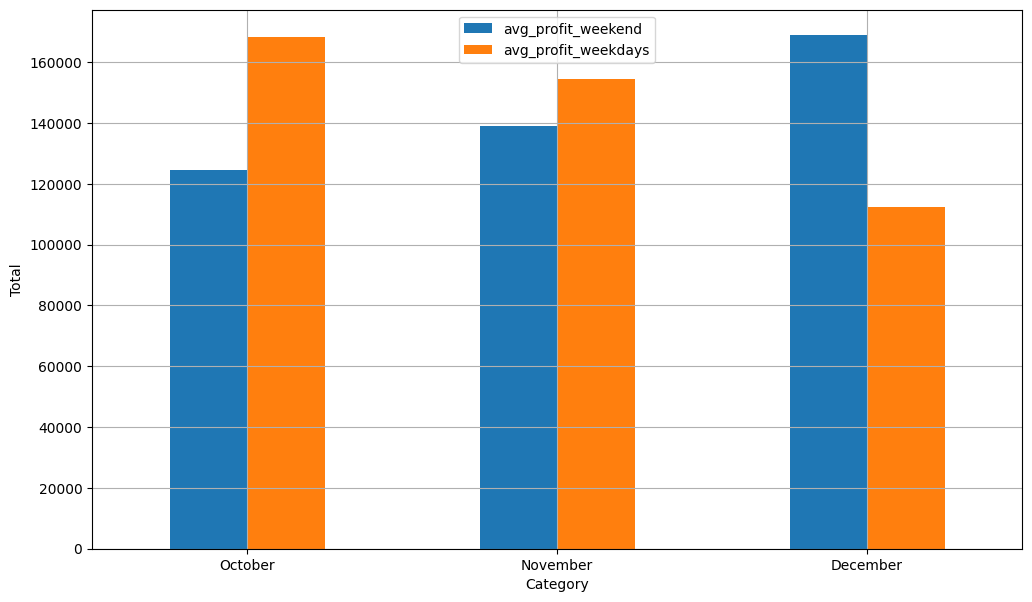

In [ ]:
data18.plot(x='month',
           y=['avg_profit_weekend','avg_profit_weekdays'],
           kind='bar',
           grid = True,
           xlabel = 'Category',
           ylabel = 'Total',
           figsize=(12,7),
           rot = 0,
           table = False,
           secondary_y = False)

## Nomor 8

In [ ]:
#Menyimpan data dalam bentuk Pandas DataFrame
data19 = df[\
            #Memfilter data dengan valid=1
            (df['is_valid']==1) &\
            (df['day'].isin(['Saturday','Sunday'])) &\
            #Memfilter data pada transaksi selama 2022
            ((df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31'))]

In [ ]:
#Menyimpan data dalam bentuk Pandas DataFrame
data20 = df[\
            #Memfilter data dengan valid=1
            (df['is_valid']==1) &\
            (df['day'].isin(['Monday','Tuesday','Wednesday','Thusday','Friday'])) &\
            #Memfilter data pada transaksi selama 2022
            ((df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31'))]

In [ ]:
data21 = {\
          'Periode':'Total 3 months',\
          'Avg Weekend Sales': round(data19['before_discount'].mean(),2), \
          'Avg Weekdays Sales': round(data20['before_discount'].mean(),2),\
          'Diff (Value)': round(data19['before_discount'].mean() - data20['before_discount'].mean(),2),\
          'Diff (%)': pd.Series(round(((data19['before_discount'].mean() - data20['before_discount'].mean())/data19['before_discount'].mean())*100,2), dtype=str)+'%'
          }
pd.DataFrame(data=data21, index=[0])

,Periode,Avg Weekend Sales,Avg Weekdays Sales,Diff (Value),Diff (%)
0,Total 3 months,136301.11,143687.84,-7386.73,-5.42%


## Nomor 9 & 10
**Dear Data Analyst**,
<br></br>
Guna mengetahui kemampuan beli pelanggan, kami membutuhkan data:
1. AOV (Average Order Value atau Total sales / Total Order) tiap bulan selama tahun 2021 vs 2022.

2. AOV tahun 2021 vs 2022.

Atas bantuan yang diberikan, kami mengucapkan terima kasih
<br></br>
Regards

**Tim Campaign**

## Nomor 9

In [ ]:
data22 = pd.DataFrame(df[(df['is_valid']==1) & ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]\
                     .groupby(by=['month_num','month'])["after_discount"].sum()\
                     .round()\
                     .reset_index(name='sales_2022'))\
                     .sort_values(by=['month_num'],ascending=True)\
                     .head(12)
data22

,month_num,month,sales_2022
0,1,January,1545218206
1,2,February,1506270759
2,3,March,2263980593
3,4,April,2117794145
4,5,May,3340913475
5,6,June,1295185399
6,7,July,1703870406
7,8,August,695291256
8,9,September,1537627843
9,10,October,475515141


In [ ]:
data23 = pd.DataFrame(df[(df['is_valid']==1) & ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]\
                     .groupby(by=['month_num','month'])["id"].nunique()\
                     .round()\
                     .reset_index(name='order_2022'))\
                     .sort_values(by=['month_num'],ascending=True)\
                     .head(12)
data23

,month_num,month,order_2022
0,1,January,4799
1,2,February,4790
2,3,March,6922
3,4,April,6348
4,5,May,9037
5,6,June,5219
6,7,July,6278
7,8,August,2412
8,9,September,1692
9,10,October,1772


In [ ]:
data24 = pd.DataFrame(df[(df['is_valid']==1) & ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]\
                     .groupby(by=['month_num','month'])["after_discount"].sum()\
                     .round()\
                     .reset_index(name='sales_2021'))\
                     .sort_values(by=['month_num'],ascending=True)\
                     .head(12)
data24

,month_num,month,sales_2021
0,1,January,387831154
1,2,February,269133278
2,3,March,277609834
3,4,April,248972305
4,5,May,274319552
5,6,June,292988281
6,7,July,1071236671
7,8,August,1281443842
8,9,September,1617193292
9,10,October,1440524193


In [ ]:
data25 = pd.DataFrame(df[(df['is_valid']==1) & ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]\
                     .groupby(by=['month_num','month'])["id"].nunique()\
                     .round()\
                     .reset_index(name='order_2021'))\
                     .sort_values(by=['month_num'],ascending=True)\
                     .head(12)
data25

,month_num,month,order_2021
0,1,January,1331
1,2,February,1119
2,3,March,1101
3,4,April,1080
4,5,May,992
5,6,June,974
6,7,July,3132
7,8,August,4019
8,9,September,5282
9,10,October,4428


In [ ]:
from sqlite3 import connect
conn = connect(':memory:')
data22.to_sql('sales_2022', conn, index=False, if_exists='replace')
data23.to_sql('order_2022', conn, index=False, if_exists='replace')
data24.to_sql('sales_2021', conn, index=False, if_exists='replace')
data25.to_sql('order_2021', conn, index=False, if_exists='replace')

12

In [ ]:
data26 = pd.read_sql("""
SELECT
    sales_2021.*,
    order_2021.order_2021,
    sales_2022.sales_2022,
    order_2022.order_2022
FROM sales_2022
LEFT JOIN order_2022
    on order_2022.month_num = sales_2022.month_num
LEFT JOIN sales_2021
    on sales_2021.month_num = sales_2022.month_num
LEFT JOIN order_2021
    on order_2021.month_num = sales_2022.month_num
""", conn)
data26

,month_num,month,sales_2021,order_2021,sales_2022,order_2022
0,1,January,387831154,1331,1545218206,4799
1,2,February,269133278,1119,1506270759,4790
2,3,March,277609834,1101,2263980593,6922
3,4,April,248972305,1080,2117794145,6348
4,5,May,274319552,992,3340913475,9037
5,6,June,292988281,974,1295185399,5219
6,7,July,1071236671,3132,1703870406,6278
7,8,August,1281443842,4019,695291256,2412
8,9,September,1617193292,5282,1537627843,1692
9,10,October,1440524193,4428,475515141,1772


In [ ]:
data26['AOV 2021'] = round(data26['sales_2021']/data26['order_2021'],2)
data26['AOV 2022'] = round(data26['sales_2022']/data26['order_2022'],2)
data26['Diff AOV (value)']= data26['AOV 2022']-data26['AOV 2021']
data26['Diff AOV (%)'] = round((data26['AOV 2022']-data26['AOV 2021'])/data26['AOV 2021']*100,2)
data26

,month_num,month,sales_2021,order_2021,sales_2022,order_2022,AOV 2021,AOV 2022,Diff AOV (value),Diff AOV (%)
0,1,January,387831154,1331,1545218206,4799,291383.29,321987.54,30604.25,10.50
1,2,February,269133278,1119,1506270759,4790,240512.31,314461.54,73949.23,30.75
2,3,March,277609834,1101,2263980593,6922,252143.36,327070.30,74926.94,29.72
3,4,April,248972305,1080,2117794145,6348,230529.91,333615.96,103086.05,44.72
4,5,May,274319552,992,3340913475,9037,276531.81,369692.76,93160.95,33.69
5,6,June,292988281,974,1295185399,5219,300809.32,248167.35,-52641.97,-17.50
6,7,July,1071236671,3132,1703870406,6278,342029.59,271403.38,-70626.21,-20.65
7,8,August,1281443842,4019,695291256,2412,318846.44,288263.37,-30583.07,-9.59
8,9,September,1617193292,5282,1537627843,1692,306170.63,908763.50,602592.87,196.82
9,10,October,1440524193,4428,475515141,1772,325321.63,268349.40,-56972.23,-17.51


<Axes: xlabel='Month', ylabel='AOV'>

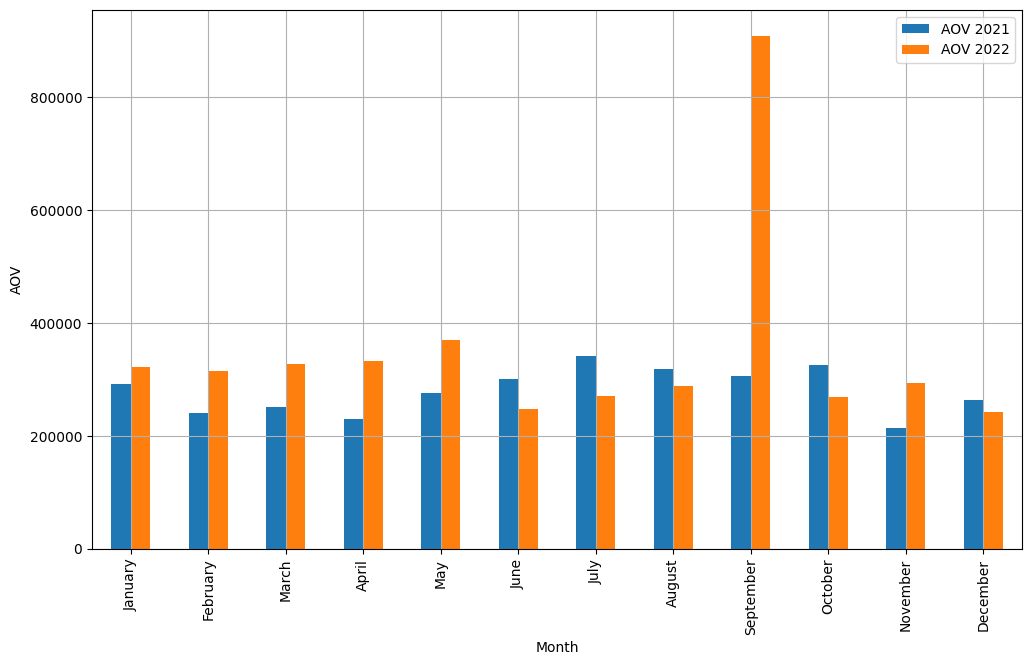

In [ ]:
data26.plot(x='month',
           y=['AOV 2021','AOV 2022'],
           kind='bar',
           grid = True,
           xlabel = 'Month',
           ylabel = 'AOV',
           figsize=(12,7),
           rot = 90,
           table = False,
           secondary_y = False)

## Nomor 10

In [ ]:
aov_2021 = round(data26['sales_2021'].sum()/data26['order_2021'].sum(),2)
aov_2022 = round(data26['sales_2022'].sum()/data26['order_2022'].sum(),2)
data27 = {\
          'Periode':'Total',\
          'AOV 2021': aov_2021, \
          'AOV 2022': aov_2022, \
          'Growth (value)': aov_2022-aov_2021,\
          'Growth': pd.Series(round((aov_2022-aov_2021)/aov_2021*100,2), dtype=str)+'%'
          }
pd.DataFrame(data=data27, index=[0])

,Periode,AOV 2021,AOV 2022,Growth (value),Growth
0,Total,260769.66,329910.09,69140.43,26.51%
